# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - The used car industry in India has grown a lot in the past few years. It has even managed to grow over the new car market in India. In 2018-19, the used car industry was valued at 4M, while the new car industry was valued at 3.6M.
 - This growing market is opening opportunities for business and asiigning the right price.
 - While the market for new cars is relatively deterministic and does not have so much variance, since it is managed by OEMs, the market for used cars has many more variables to take into account and can create a lot of variability in the final price. Therefore, the need to assign the right price to a used car is needed to break into the industry.

### **The objective:**

 - Create a statistical model that effectively predicts the price of a used car in the Indian Market to be able to correctly assign the price to a used car at the time of selling.

### **The key questions:**

- Which supervised learning model predicts the price of a used car better?
- Which varibles are of higher importance when calculating the price of a used car? Which variables are not?
- Which variables have high interaction with one another?

### **The problem formulation**:

- Generate a statistical model with a continuous dependent variable (price) using the "usedcars" dataset.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [1]:
# Importing required libraries for data wrangling
import pandas as pd
import numpy as np
# Importing requred libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **Loading the Data**

In [2]:
df = pd.read_csv("used_cars.csv")

## Data Overview

Let's start by getting the top 5 rows of our dataset to get a better idea of how it looks:

In [3]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


**Observations:**

* The price of a used car is shown by the variable "Price".
* The variable is portrayed in INR 100,000.
* The variable "S.No." seems to be an indexing variable that will not bring any insights to our analysis. It should be removed.
* The variables Mileage, Engine, Power, Seats, New_price and price look like float variables while the variables year, Kilometers_Driven look like integer variables. The variables Name, Location, Fuel, Transmission and Owner_Type look like categorical variables, yet all of this can be confirmed when looking into df.info()

In [4]:
df = df.drop("S.No.", axis = 1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


### **Checking the info of the data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


* There are 7253 entries in the data with 13 columns, including the dependent variable.
* We can confirm our assumptions from above about the variable types.
* We can see that half of the variables have no null values (Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type)
* The variables Engine and Seats have a couple of missing values, yet not a high amount.
* We can see that the variables with the most amount of missing variables are Price (6019) and New_price (1006). This tell us that we have a lot of missing data in the New_price and should be treated or removed.

## **Exploratory Data Analysis**

### Summary Statistics:
#### Numerical Variables:

In [6]:
num_variables = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price'] #for future use

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


**Observations:**
* The summary statistics are only provided for numerical variables.
* The variable Kilometers driven seem to have a lot of outliers above Q3, since Q3 = 73000 and the maximum value equals 6.5million.
* The variable Mileage also sees to have outliers, but in the lower end since it is very unprobable that an used car has been driven 0 miles. They could also be missing values.
* We can see that most of the used vehicles have 5 seats, given that all the values between Q1 and Q3 equal 5.
* There seems to be quite a couple of outliers in the variable Engine, given that Q3 = 1968 and max value = 5998. Besides that, most cars seems to stay withing the same range when it comes to engine.
* We can see that most of the priced values stay under 10 (INR 10000), yet there seem to be quite a few outliers since the maximum value is 160 (INR 10000). 
* A similar effect to Price happens with New_price. Most of the priced values stay under 26.04 (INR 10000), yet there seem to be quite a few outliers since the maximum value is 375 (INR 10000). We can see reflected the price difference between a new car and a used car and why this is a rising issue in the Indian car market.


#### Categorical Variables:

In [7]:
cat_variables = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'] #list of vategorical variables

for i in cat_variables:
    print(df[i].value_counts(normalize = True))
    print('*' * 40)

Mahindra XUV500 W8 2WD                  0.007583
Maruti Swift VDI                        0.006756
Maruti Swift Dzire VDI                  0.005791
Honda City 1.5 S MT                     0.005377
Maruti Swift VDI BSIV                   0.005101
                                          ...   
Chevrolet Beat LT Option                0.000138
Skoda Rapid 1.6 MPI AT Elegance Plus    0.000138
Ford EcoSport 1.5 TDCi Ambiente         0.000138
Hyundai i10 Magna 1.1 iTech SE          0.000138
Hyundai Elite i20 Magna Plus            0.000138
Name: Name, Length: 2041, dtype: float64
****************************************
Mumbai        0.130842
Hyderabad     0.120778
Coimbatore    0.106439
Kochi         0.106439
Pune          0.105474
Delhi         0.090997
Kolkata       0.090170
Chennai       0.081484
Jaipur        0.068799
Bangalore     0.060665
Ahmedabad     0.037915
Name: Location, dtype: float64
****************************************
Diesel      0.531091
Petrol      0.458431
CNG         

**Observations:**
* The variable 'Name' has so many entries that it is impossible to make any sure assumptions about the data. Possibly cleaning this variable  might lead us to gain better insight of the data.
* The locations of the used_cars in the dataset seems to be relatively evenly distributed among 11 cities. Ahmedabad has the smallest percentage of the market with only around 3%.
* The bulk of the used cars market is composed by cars with fuel_type equals Diesel or Petrol. Only around 1% of the cars have different categories of fuel_type. Part of this last group are electric cars, which tels us that the market for used electric cars in India is almost non-existent
* 71% of the cars are Manual.
* Around 82% of the cars have only be owned by one person before selling.

### Unique Observations:

In [8]:
df[cat_variables].nunique()

Name            2041
Location          11
Fuel_Type          5
Transmission       2
Owner_Type         4
dtype: int64

**Observations:**
* We can see that most of the categorical variables (all except Name) have a small number of unique observations, which leads us to believe that these are actually nominal variables. The only exception being Transmision, which would be a binary variable since the umber of unique observations = 2.
* The variable "Name" does have quite a high number of unique observations (2041), which is something that had already been noted when performing the summary statistics for the categorical variables and further supports the decision to create a cleaned version of the variable 'Name'. Yet from the view we got from `df.head()`, we can see that the entries in this variable start with the brand of the car at hand. We can do some feature engineerong on this variable to gain more insight into the dataset using the following code:
    * `df['Brand'] = df['Name'].apply(lambda var : var.split(" ")[0]`
    * We can see from the line of code below that this reduces the number of unique varibles to 33 and provides better insight to the dataset.
* Using the same idea aqs Brand, we could attempt to create a Model variable:
    * `df['Model'] = df['Name'].apply(lambda var : var.split(" ")[1]`
    * We can see from the line of code below that this would allow us to have 219 unique obersavions for 'Model'.

In [9]:
#Number of unique observations after cleaning the variabole 'Name'
df['Name'].apply(lambda var : var.split(" ")[0]).nunique() 

33

In [10]:
df['Name'].apply(lambda var : var.split(" ")[1]).nunique() 

219

### Extreme Values:

From the summary functions and observations, I believe that there are some outliers in the variables Mileage and Kilometers_Driven:

In [11]:
# Showing outliers for Mileage
mil_sorted = df.sort_values(by = ['Mileage'], ascending = True)
mil_sorted.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN


In [12]:
df[df['Mileage'] == 0].shape[0]

81

In [13]:
# Showing outliers for Kilometers_Driven:
kil_sorted = df.sort_values(by = ['Kilometers_Driven'], ascending = False)
kil_sorted.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.0
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.5
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.9
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.7
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.0


**Observations**
* Mileage: We can see that there is a significant number of observations that have a mileage of 0. This seems quie imposible for used vehicles, as we mentioned before. We could fill in the values for mileage by gathering the median of the vehicles of the same model. This can also be done in feature engineering along with the variables with missing values.
* Kilometers_Driven: we can see there is a significatly outlier in teh dataset (6.5M), specially since the second highest value is 750000. Since this seems like a very unlikely number of kilometers driven, we shoud drop the value.

In [14]:
#Identify observation with outlier & dropping it
ind = df[df['Kilometers_Driven'] == max(df['Kilometers_Driven'])].index
df = df.drop(index = (ind))

## **Univariate Analysis**

### Numerical Variables:

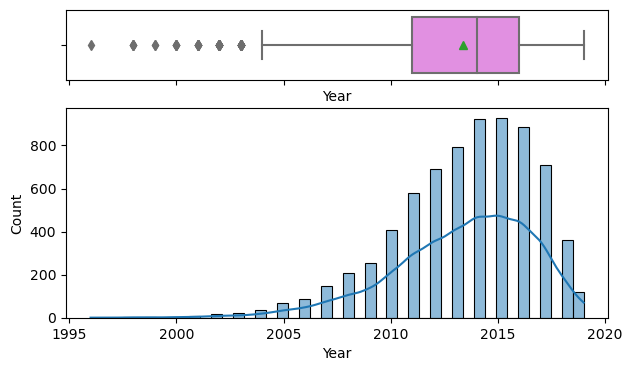

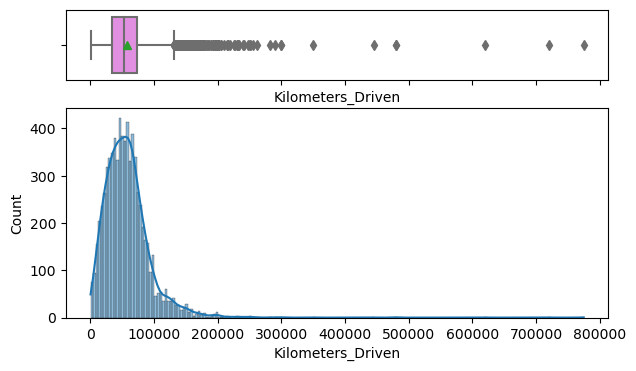

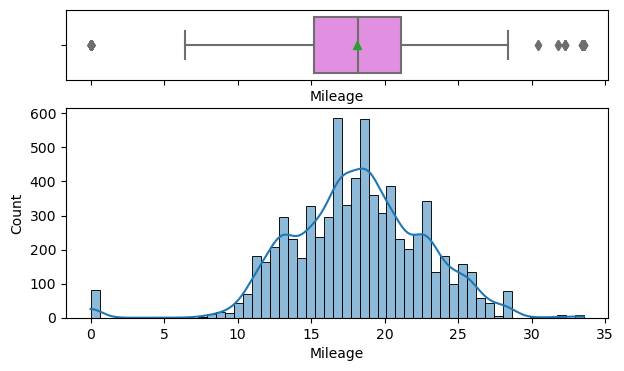

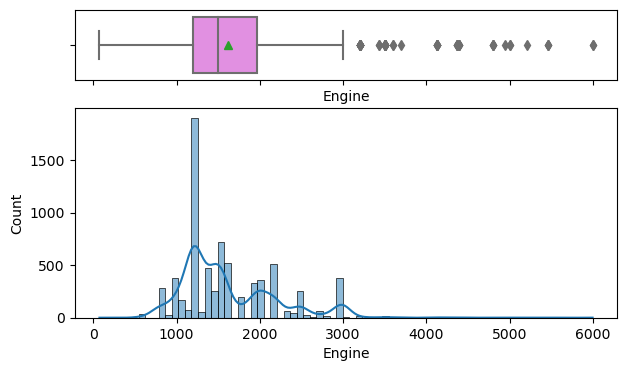

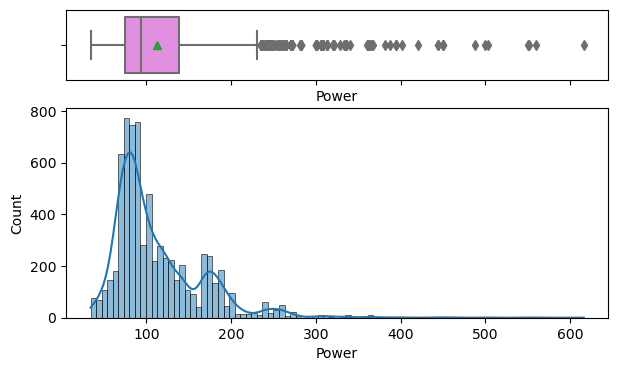

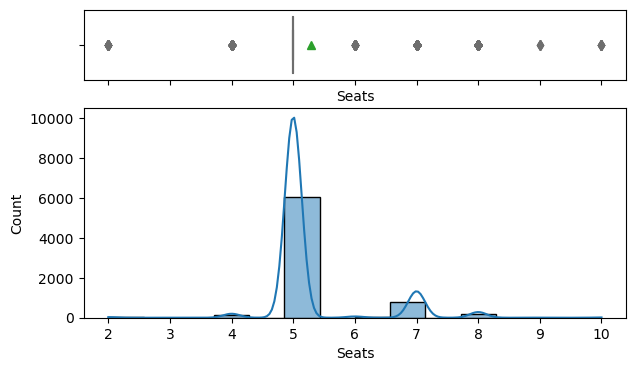

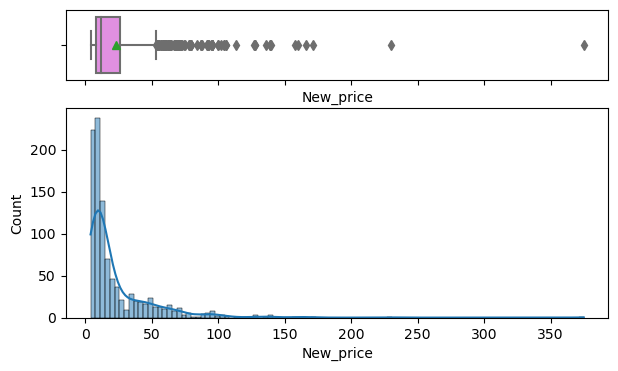

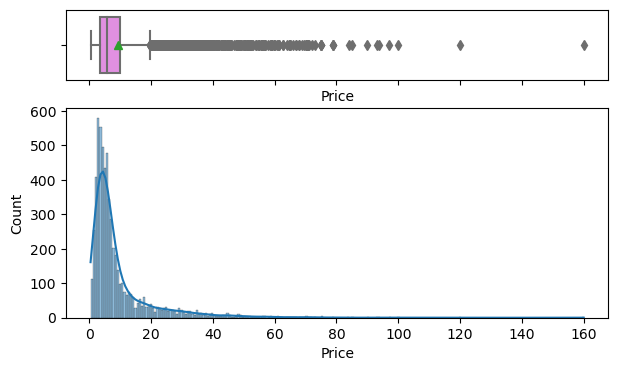

In [15]:
for feature in num_variables: #df.columns:
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = (7, 4)) 
    
    sns.boxplot(data = df, x = feature, ax = ax_box2, showmeans = True, color = "violet")
    sns.histplot(data = df, x = feature, kde = True)
    plt.show()

**Observations:**
* Year: it looks like there is a left-skewed distribution, which shows that most of the used cars in India are less than 10 years old in 2018. There are a couple of outliers before the year 2004.
* Kilometers_Driven: it is an extremely righly-skewed distribution, which could benefit fom a logarithmic transforation. We can also see that because of this extremely skewed distribution, there are a lot of outliers. Yet, this distributions shows us that most of the cars are under 200000 km driven.
* Mileage: it is close to a normal distribution with the center around 17. The majority of the used cars have a mileage between 10 and 25 kmpl. We can see there are some outliers on some ends. On the upper end, there are quite a few outliers between 30 and 35 kmpl. On the lower end, there are the outliers at 0, which we can treat as missing values and will fill in in the feature engineering.
* Engine: it is a slightly right-skewed distribution with upper outliers. We can see that most of the used cars have an engine of around 1200.
* Power: it is a rightly skewed distribution, with a lot of vaues over the Q3. We can see that, indeed, the median is lower than the average of the disribution, which is characteritic of a rightly-skewed distribution. Theresfore, most of the used cars have a power below 100.
* Seats: looking at the distribution, it looks like a nominal variable, given that there are only 9 groups, so we shouldn't pay a lot of attention to the distribution shape. We can see that most of the cars have 5 seats.
* New_price: it is an extremely rightly skewed distribution, which could benefit from a logarithmic trasformation. We can see here that most of the used cars had a new_price value under 100 (INR 100,000).
* Price: it is an extremely rightly skewed distribution, which could benefit from a logarithmic trasformation. We can see here that most of the used cars price are value under 40 (INR 100,000).

### Categorical Variables:

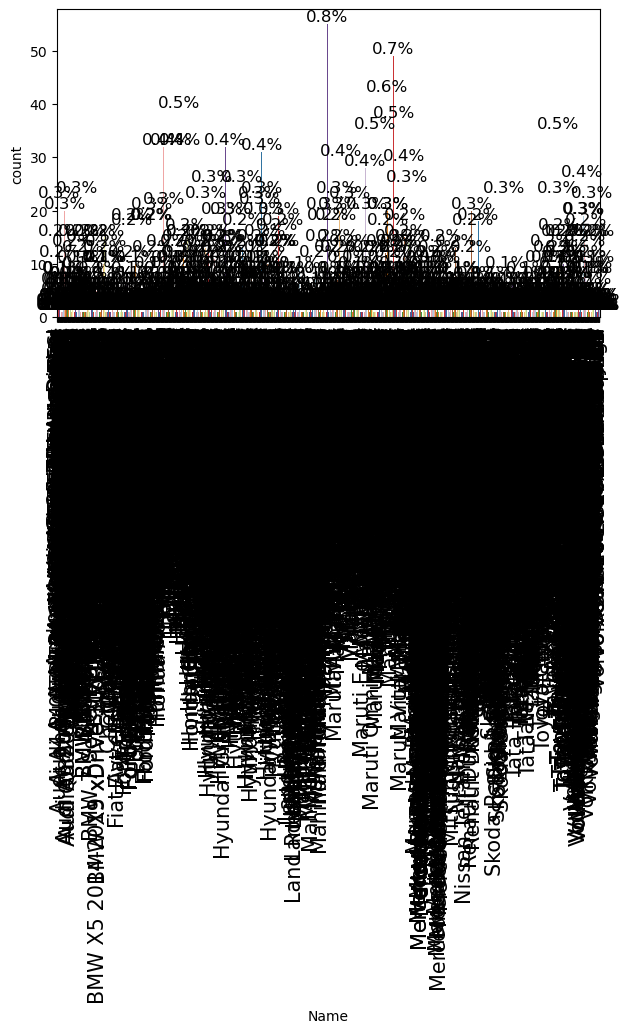

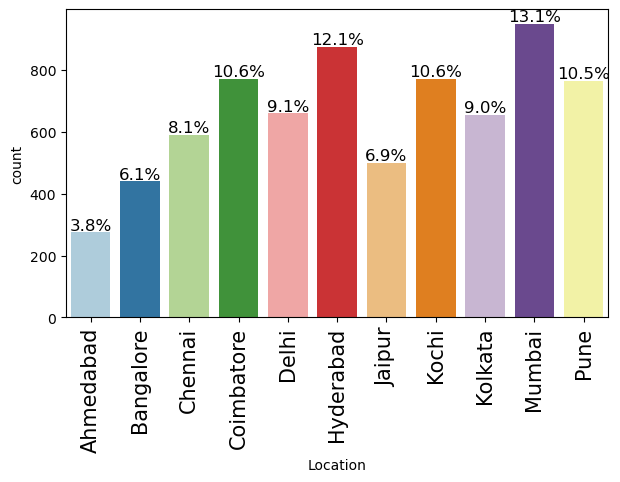

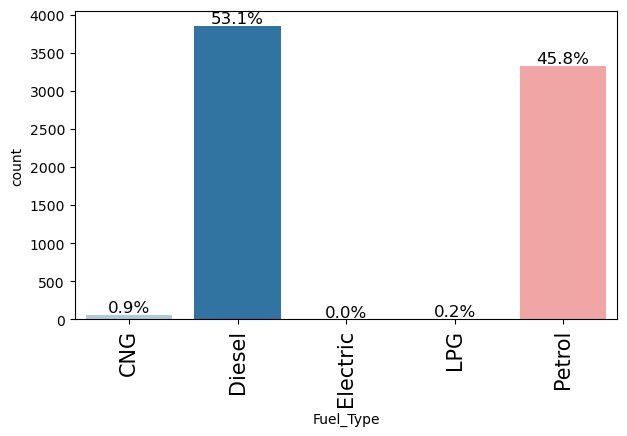

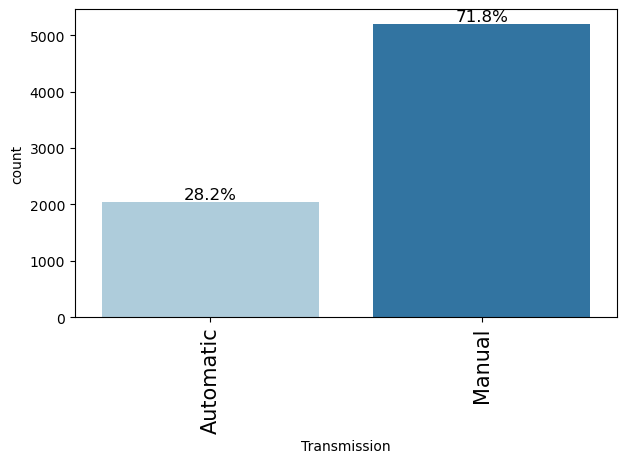

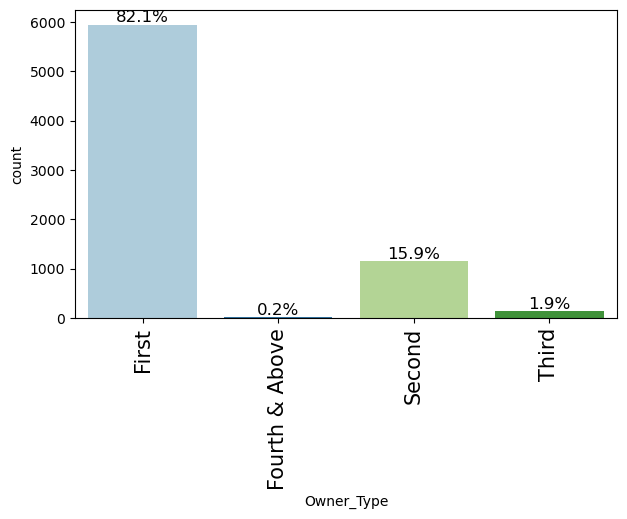

In [16]:
for feature in cat_variables:
    total = len(df[feature])  # Length of the column
    count = df[feature].nunique()
    plt.figure(figsize = (7,4))
    
    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot( data = df, x = feature, palette = "Paired",
        order = df[feature].value_counts().index.sort_values())

    for p in ax.patches:
        label = "{:.1f}%".format(
                100 * p.get_height() / total )   # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(label, (x, y), ha = "center", va = "center", size = 12,
            xytext = (0, 5), textcoords = "offset points")  # Annotate the percentage

    plt.show()

**Observations:**
* Name: The categorical variable has so many columns that it is very difficult to identify a certain distribution. Further supports the fact that some variable cleaning should be done on this variable.
* Location: We can see that Mumbai and Hyderabad have the highest number of used cars, with 13.1% and 12.1% of the used cars. We can also see that there is not a big imparity of distribution in the cities in the dataset, yet these values are not close enough for it to be a uniform distribution.
* Fuel Type: we can see that the used cars market in India is dominated by the Diesel and Petrol fuel cars. The rest of the fuel types composed around 1% of the market.
* Transmission: it is a binary variable, which shows us that most of the used cars in India are manual. The manual cars composed 71.8% of the data and the automatic cars composed the other 28.2% of the market.
* Owner_Type: We can see that most of the used cars in the Indian market have only be owned one time (82.1%). It is only 0.2% probable that an used car in the Indian market will not be owned more than 3 times.

### Log Transformations

From the univariate analysis on the numerical data, we will be performing logarithmic transformations to the variables: Kilometers_Driven, New_price, Price.

In [17]:
prev_len = len(df.columns)
df["Kilometers_Driven_log"] = np.log(df["Kilometers_Driven"])
df["Price_log"] = np.log(df["Price"])

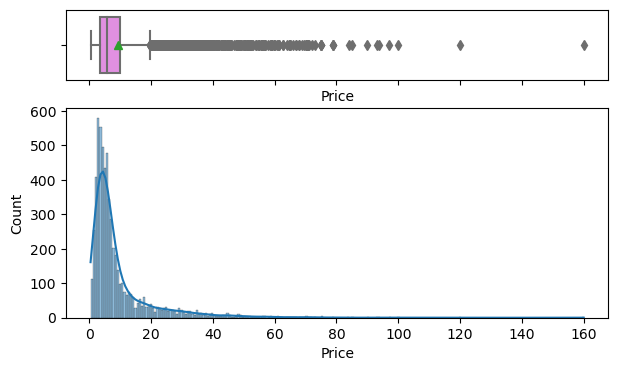

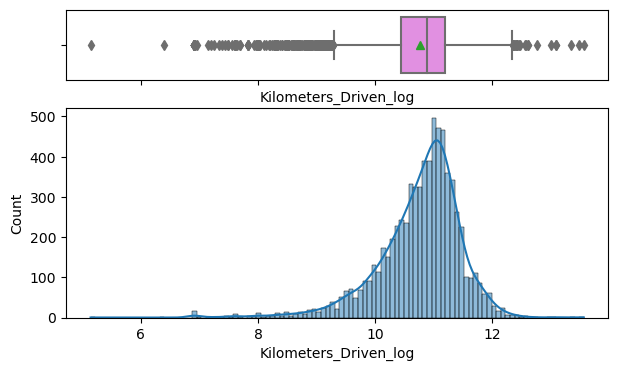

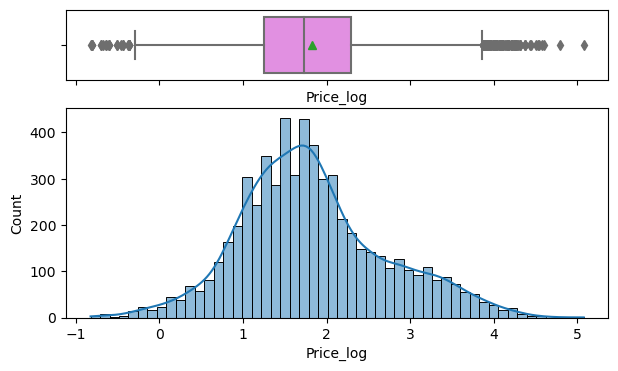

In [18]:
for feature in df.columns[np.arange(len(df.columns) - 3, len(df.columns))]: #df.columns:
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = (7, 4)) 
    
    sns.boxplot(data = df, x = feature, ax = ax_box2, showmeans = True, color = "violet")
    sns.histplot(data = df, x = feature, kde = True)
    plt.show()

## **Bivariate Analysis**

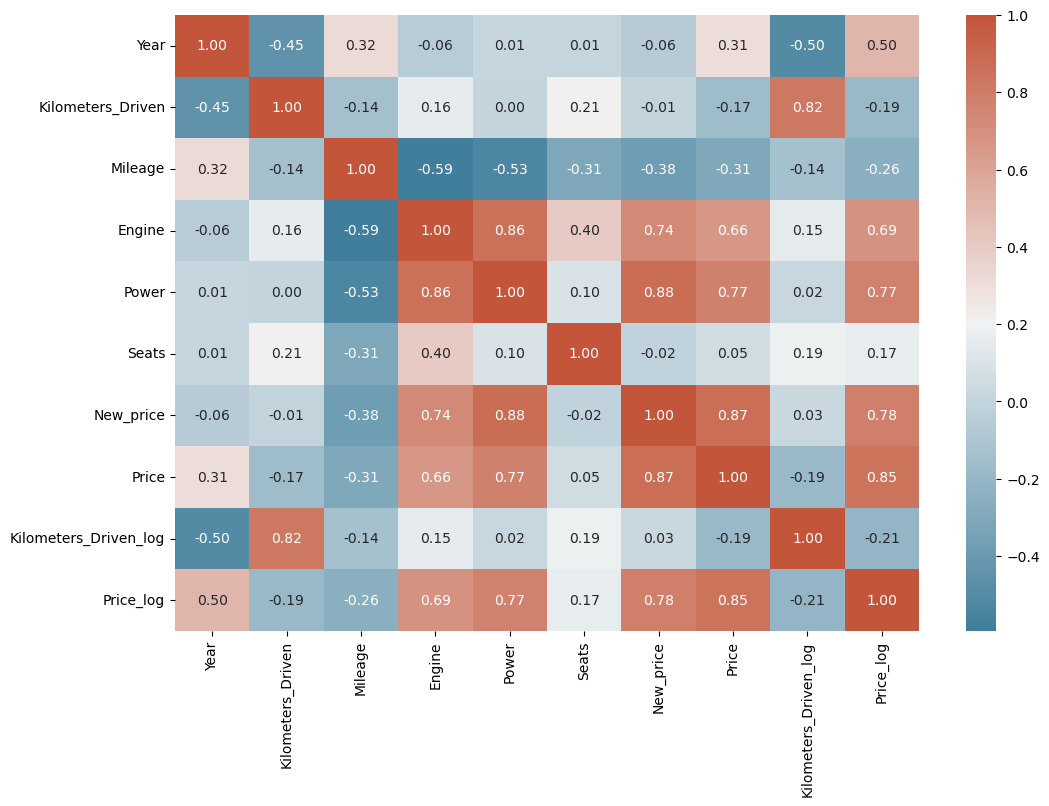

In [19]:
plt.figure(figsize = (12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap)

plt.show()

**Observations of Heat Map:**
* We can see that some the highest correlations belong to the variables that had logarithmic transformations and their origin variable: Kilometers_Driven - Kilometers_Driven_log (0.82), New_price - New_price_log (0.86) and price - price_log (0.85). Yet these correlations are expected since one is a transformation of the other.
* The highest correlation in magnitude, not including the correlations mentioned before, can be seen between the variables New_price - Power (0.88).
* Additionally, we have some high correlations among the variables: New_price - Price (0.87), Engine - Power (0.86), New_Price_Log - New_price (0.86), Price - Price_log (0.85), Kilometers_Driven - Kilometers_Driven_log (0.82), Engine - New_Price_Log (0.82), New_Price_Log - Price (0.81), New_price - Price_log (0.78), Power - Price (0.77), Power - Price_log (0.77), Engine - New_price (0.74). 
* There are a lot of highly correlated variables because there are some logarithmic transformations, and if there is a high correlation with the original variable, the logarithmic transformation will probably have a high correlations.
* There are some medium correlations among the variables: Kilometers_Driven - Year (-0.45), Engine - Mileage (-0.59), Mileage - Year (0.32), Price - Year (0.31), Price_log - Year (0.50), Kilometers_Driven_log - Year (-0.50), Mileage - Power (-0.53), Mileage - Seats (-0.31), Mileage - New_price (-0.38), Mileage - Price (-0.31) Mileage - New_Price_Log (-0.49), Engine - Seats (0.40), Engine - Price (0.66), Engine - Price_log (0.69).
* The rest of the variable combinations have small or no correlations.

### Boxplot for Location Variable:

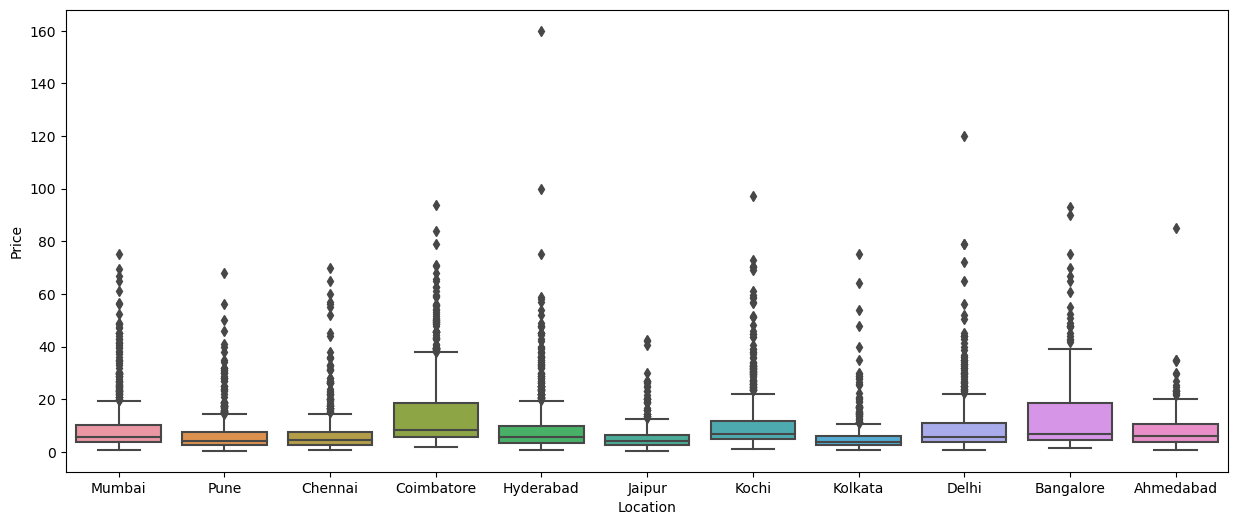

In [20]:
# Boxplot for Location - Price
plt.figure(figsize = (15, 6)) # Setting size of boxplot
sns.boxplot(x = df['Location'], y = df['Price']) # Defining x and y
plt.show()

**Observations:**
* We can see that all of the locations in the dataset have outliers when it comes to price.
* Yet we see that all the locations have the same range of prices.

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [21]:
df['Brand'] = df['Name'].apply(lambda var : var.split(" ")[0])
df['Car_Model'] = df['Name'].apply(lambda var : var.split(" ")[1])

### **Missing value treatment**

* We know from `df.info()` that we have quite a couple of variables with missing data: Mileage
* We should calculate the medians of those variables grouped by `Car_Model` to get a better estimate of those values.

In [22]:
# Getting the original number of missing values
df.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
Kilometers_Driven_log       0
Price_log                1234
Brand                       0
Car_Model                   0
dtype: int64

In [23]:
df["Mileage"] = df["Mileage"].fillna(df.groupby('Car_Model')['Mileage'].transform('median'))
df["Seats"] = df["Seats"].fillna(df.groupby('Car_Model')['Seats'].transform('median'))
df["Engine"] = df["Engine"].fillna(df.groupby('Car_Model')['Engine'].transform('median'))
df["Power"] = df["Power"].fillna(df.groupby('Car_Model')['Power'].transform('median'))
df["New_price"] = df["New_price"].fillna(df.groupby('Car_Model')['New_price'].transform('median'))

In [24]:
#Get the number of missing avlues after filling in
df.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                      0
Power                      12
Seats                       3
New_price                1498
Price                    1234
Kilometers_Driven_log       0
Price_log                1234
Brand                       0
Car_Model                   0
dtype: int64

From here we can see that the filling of the missing values worked efficiently and we have a more complete dataset.

Now, before running models, we remove all of the rows that do not have a value (NA) in the dependent variable.

In [25]:
df = df[df.isna() == False]
df = df[df.isnull() == False]
df = df.dropna()

## **Important Insights from EDA and Data Preprocessing**

### Summary Statistics:
#### Numerical Variables:
* The summary statistics are only provided for numerical variables.
* The variable Kilometers driven seem to have a lot of outliers above Q3, since Q3 = 73000 and the maximum value equals 6.5million.
* The variable Mileage also sees to have outliers, but in the lower end since it is very unprobable that an used car has been driven 0 miles. They could also be missing values.
* We can see that most of the used vehicles have 5 seats, given that all the values between Q1 and Q3 equal 5.
* There seems to be quite a couple of outliers in the variable Engine, given that Q3 = 1968 and max value = 5998. Besides that, most cars seems to stay withing the same range when it comes to engine.
* We can see that most of the priced values stay under 10 (INR 10000), yet there seem to be quite a few outliers since the maximum value is 160 (INR 10000). 
* A similar effect to Price happens with New_price. Most of the priced values stay under 26.04 (INR 10000), yet there seem to be quite a few outliers since the maximum value is 375 (INR 10000). We can see reflected the price difference between a new car and a used car and why this is a rising issue in the Indian car market.

#### Categorical Variables:
* The variable 'Name' has so many entries that it is impossible to make any sure assumptions about the data. Possibly cleaning this variable  might lead us to gain better insight of the data.
* The locations of the used_cars in the dataset seems to be relatively evenly distributed among 11 cities. Ahmedabad has the smallest percentage of the market with only around 3%.
* The bulk of the used cars market is composed by cars with fuel_type equals Diesel or Petrol. Only around 1% of the cars have different categories of fuel_type. Part of this last group are electric cars, which tels us that the market for used electric cars in India is almost non-existent
* 71% of the cars are Manual.
* Around 82% of the cars have only be owned by one person before selling.

#### Unique Observations:
* We can see that most of the categorical variables (all except Name) have a small number of unique observations, which leads us to believe that these are actually nominal variables. The only exception being Transmision, which would be a binary variable since the umber of unique observations = 2.
* The variable "Name" does have quite a high number of unique observations (2041), which is something that had already been noted when performing the summary statistics for the categorical variables and further supports the decision to create a cleaned version of the variable 'Name'. Yet from the view we got from `df.head()`, we can see that the entries in this variable start with the brand of the car at hand. We can do some feature engineerong on this variable to gain more insight into the dataset using the following code:
    * `df['Brand'] = df['Name'].apply(lambda var : var.split(" ")[0]`
    * We can see from the line of code below that this reduces the number of unique varibles to 33 and provides better insight to the dataset.
* Using the same idea aqs Brand, we could attempt to create a Model variable:
    * `df['Model'] = df['Name'].apply(lambda var : var.split(" ")[1]`
    * We can see from the line of code below that this would allow us to have 219 unique obersavions for 'Model'.
    
#### Extreme Values:
* Mileage: We can see that there is a significant number of observations that have a mileage of 0. This seems quie imposible for used vehicles, as we mentioned before. We could fill in the values for mileage by gathering the median of the vehicles of the same model. This can also be done in feature engineering along with the variables with missing values.
* Kilometers_Driven: we can see there is a significatly outlier in teh dataset (6.5M), specially since the second highest value is 750000. Since this seems like a very unlikely number of kilometers driven, we shoud drop the value.

### Univariate Analysis:
#### Numerical Variables:
* Year: it looks like there is a left-skewed distribution, which shows that most of the used cars in India are less than 10 years old in 2018. There are a couple of outliers before the year 2004.
* Kilometers_Driven: it is an extremely righly-skewed distribution, which could benefit fom a logarithmic transforation. We can also see that because of this extremely skewed distribution, there are a lot of outliers. Yet, this distributions shows us that most of the cars are under 200000 km driven.
* Mileage: it is close to a normal distribution with the center around 17. The majority of the used cars have a mileage between 10 and 25 kmpl. We can see there are some outliers on some ends. On the upper end, there are quite a few outliers between 30 and 35 kmpl. On the lower end, there are the outliers at 0, which we can treat as missing values and will fill in in the feature engineering.
* Engine: it is a slightly right-skewed distribution with upper outliers. We can see that most of the used cars have an engine of around 1200.
* Power: it is a rightly skewed distribution, with a lot of vaues over the Q3. We can see that, indeed, the median is lower than the average of the disribution, which is characteritic of a rightly-skewed distribution. Theresfore, most of the used cars have a power below 100.
* Seats: looking at the distribution, it looks like a nominal variable, given that there are only 9 groups, so we shouldn't pay a lot of attention to the distribution shape. We can see that most of the cars have 5 seats.
* New_price: it is an extremely rightly skewed distribution, which could benefit from a logarithmic trasformation. We can see here that most of the used cars had a new_price value under 100 (INR 100,000).
* Price: it is an extremely rightly skewed distribution, which could benefit from a logarithmic trasformation. We can see here that most of the used cars price are value under 40 (INR 100,000).

#### Categorical Variables:
* Name: The categorical variable has so many columns that it is very difficult to identify a certain distribution. Further supports the fact that some variable cleaning should be done on this variable.
* Location: We can see that Mumbai and Hyderabad have the highest number of used cars, with 13.1% and 12.1% of the used cars. We can also see that there is not a big imparity of distribution in the cities in the dataset, yet these values are not close enough for it to be a uniform distribution.
* Fuel Type: we can see that the used cars market in India is dominated by the Diesel and Petrol fuel cars. The rest of the fuel types composed around 1% of the market.
* Transmission: it is a binary variable, which shows us that most of the used cars in India are manual. The manual cars composed 71.8% of the data and the automatic cars composed the other 28.2% of the market.
* Owner_Type: We can see that most of the used cars in the Indian market have only be owned one time (82.1%). It is only 0.2% probable that an used car in the Indian market will not be owned more than 3 times.

### Bivariate Analysis:
* We can see that some the highest correlations belong to the variables that had logarithmic transformations and their origin variable: Kilometers_Driven - Kilometers_Driven_log (0.82), New_price - New_price_log (0.86) and price - price_log (0.85). Yet these correlations are expected since one is a transformation of the other.
* The highest correlation in magnitude, not including the correlations mentioned before, can be seen between the variables New_price - Power (0.88).
* Additionally, we have some high correlations among the variables: New_price - Price (0.87), Engine - Power (0.86), New_Price_Log - New_price (0.86), Price - Price_log (0.85), Kilometers_Driven - Kilometers_Driven_log (0.82), Engine - New_Price_Log (0.82), New_Price_Log - Price (0.81), New_price - Price_log (0.78), Power - Price (0.77), Power - Price_log (0.77), Engine - New_price (0.74). 
* There are a lot of highly correlated variables because there are some logarithmic transformations, and if there is a high correlation with the original variable, the logarithmic transformation will probably have a high correlations.
* There are some medium correlations among the variables: Kilometers_Driven - Year (-0.45), Engine - Mileage (-0.59), Mileage - Year (0.32), Price - Year (0.31), Price_log - Year (0.50), Kilometers_Driven_log - Year (-0.50), Mileage - Power (-0.53), Mileage - Seats (-0.31), Mileage - New_price (-0.38), Mileage - Price (-0.31) Mileage - New_Price_Log (-0.49), Engine - Seats (0.40), Engine - Price (0.66), Engine - Price_log (0.69).
* The rest of the variable combinations have small or no correlations.

### Feature Engineering:
* We know from `df.info()` that we have quite a couple of variables with missing data: Mileage
* We should calculate the medians of those variables grouped by `Car_Model` to get a better estimate of those values.
* From here we can see that the filling of the missing values worked efficiently and we have a more complete dataset.
* Before running models, we remove all of the rows that do not have a value (NA) in the dependent variable.

## **Building Various Models**


1. What we want to predict is the "Price". I will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

In [26]:
#Step 1
x = df.drop(['Name','Price','Price_log','Kilometers_Driven'], axis = 1)
y = df[["Price_log", "Price"]]

#Step 2
x = pd.get_dummies(x, columns = x.select_dtypes(include = ["object"]).columns.tolist(), drop_first = True)
y = pd.get_dummies(y, columns = y.select_dtypes(include = ["object"]).columns.tolist(), drop_first = True)

#Step 3
from sklearn.model_selection import train_test_split
x_training, x_test, y_training, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)


#### Notes on the above Code:
* We should remove Price and Price_log from the dataset because these are the dependent variables.
* We remove Name because, thanks to some feature engineering, processed some more informative variables (Brand, Car_Model).
* We remove Kilometers_Driven because we did a logarithmic transformation and it would be rebundant to keep both.

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

In [27]:
#Scores function creation

from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import sklearn.metrics as metrics

# Creating Dataframe to store scores from tests:
scores_table = pd.DataFrame(columns = ['Model', 'Rsquared Train', 'Rsquared Test', 'RMSE Train', 'RMSE Test'])
precision_table = pd.DataFrame(columns = ['Model', 'Rsquared Train', 'Rsquared Test', 'RMSE Train', 'RMSE Test'])

#Creating Score calculating formula
## Since the prediction and calculation code is the same for all of the models, 
##     it is simpler to create a function
def scores(model, model_name = "Default", x_training = x_training, x_test = x_test):
    pred_train = model.predict(x_training)
    pred_test = model.predict(x_test)
    prediction_train = np.exp(pred_train)
    prediction_test = np.exp(pred_test)
    r2_training = metrics.r2_score(y_training['Price'], prediction_train)
    rmse_training = metrics.mean_squared_error(y_training['Price'], prediction_train, squared = False)
    r2_test = metrics.r2_score(y_test['Price'], prediction_test)
    rmse_test = metrics.mean_squared_error(y_test['Price'], prediction_test, squared = False)
    
    if model_name == "Default":
        return_value = [model, r2_training, r2_test, rmse_training, rmse_test]
    else:
        return_value = [model_name, r2_training, r2_test, rmse_training, rmse_test]
    # Returning values
    return return_value


def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Canceled', 'Canceled'], yticklabels = ['Not Canceled', 'Canceled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    


## Linear Regression

In [28]:
#Loading functions from Library
from sklearn.linear_model import LinearRegression

#Training the model
lr = LinearRegression()
lr.fit(x_training, y_training['Price_log']) 

#Score storing
scores_table.loc[scores_table.shape[0]] = scores(lr)
scores_table

,Model,Rsquared Train,Rsquared Test,RMSE Train,RMSE Test
0,LinearRegression(),0.940486,0.888691,2.571031,3.449431


In [29]:
#To get
pd.DataFrame(list(zip(lr.feature_names_in_, lr.coef_)), columns = ['Feature', 'Coefficient'])

,Feature,Coefficient
0,Year,0.109771
1,Mileage,0.001047
2,Engine,-0.000133
3,Power,0.003377
4,Seats,0.022592
...,...,...
150,Car_Model_Xcent,0.087766
151,Car_Model_Xylo,-0.156103
152,Car_Model_Zest,-0.001721
153,Car_Model_i20,0.301280


We can see that the initial model performs pretty well, yet we could improve it. To get more details on how the linear regression was created and to be able to remove unnecessary variables, the same model will be run with `statsmodels`.

In [30]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel does not add a constant by default. We need to add it explicitly.
# We are also creating copies of the dataset to be able to go back to it if necessary.
x_training_ols = x_training.copy()
x_training_ols = sm.add_constant(x_training_ols)
x_test_ols = x_test.copy()
x_test_ols = sm.add_constant(x_test_ols)

def build_ols_model(train):
    olsmodel = sm.OLS(y_training["Price_log"], train)
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_training_ols)
#scores_table.loc[scores_table.shape[0]] = scores(olsmodel1)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     564.5
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:16:57   Log-Likelihood:                 1320.6
No. Observations:                3349   AIC:                            -2377.
Df Residuals:                    3217   BIC:                            -1570.
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

We can see that there are quite a couple of variables that have p values higher than 0.05, such as Mileage, Seats, Location_Jaipur and Location_Kochi. We should remove them and re-run the model again.

In [31]:
# Identifying and removing the features that have a p-value higher than 0.05 from the statsmodel dataset.
olsmod = pd.DataFrame(list(zip(olsmodel1.params, olsmodel1.pvalues)), columns = ['Coef', 'pval'], index = olsmodel1.params.index)

x_training_ols = x_training_ols.drop(olsmod[olsmod['pval'] > 0.05].index, axis = 1)
x_test_ols = x_test_ols.drop(olsmod[olsmod['pval'] > 0.05].index, axis = 1)

# Removing the features that have a p-value higher than 0.05 from the skit-learn dataset.
x_training_lr = x_training.drop(olsmod[olsmod['pval'] > 0.05].index, axis = 1)
x_test_lr = x_test.drop(olsmod[olsmod['pval'] > 0.05].index, axis = 1)

#Run linear regression with the removed variables.
lr2 = LinearRegression()
lr2.fit(x_training.drop(olsmod[olsmod['pval'] > 0.05].index, axis = 1), y_training['Price_log']) 

#Score storing
scores_table.loc[scores_table.shape[0]] = scores(lr2, 'Linear Regression 2',
                                                 x_training = x_training_lr,
                                                 x_test = x_test_lr)
scores_table

,Model,Rsquared Train,Rsquared Test,RMSE Train,RMSE Test
0,LinearRegression(),0.940486,0.888691,2.571031,3.449431
1,Linear Regression 2,0.937736,0.887172,2.629762,3.472887


In [32]:
olsmodel2 = build_ols_model(x_training_ols)
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     587.9
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:16:57   Log-Likelihood:                 1239.7
No. Observations:                3349   AIC:                            -2237.
Df Residuals:                    3228   BIC:                            -1497.
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -217.84

In [33]:
# Identifying and removing the features that have a p-value higher than 0.05 from the statsmodel dataset.
olsmod2 = pd.DataFrame(list(zip(olsmodel2.params, olsmodel2.pvalues)), columns = ['Coef', 'pval'], index = olsmodel2.params.index)

x_training_ols = x_training_ols.drop(olsmod2[olsmod2['pval'] > 0.05].index, axis = 1)
x_test_ols = x_test_ols.drop(olsmod2[olsmod2['pval'] > 0.05].index, axis = 1)

# Removing the features that have a p-value higher than 0.05 from the skit-learn dataset.
x_training_lr = x_training_lr.drop(olsmod2[olsmod2['pval'] > 0.05].index, axis = 1)
x_test_lr = x_test_lr.drop(olsmod2[olsmod2['pval'] > 0.05].index, axis = 1)

#Run linear regression with the removed variables.
lr3 = LinearRegression()
lr3.fit(x_training_lr, y_training['Price_log']) 

#Score storing
scores_table.loc[scores_table.shape[0]] = scores(lr3, 'Linear Regression 3',
                                                 x_training = x_training_lr,
                                                 x_test = x_test_lr)
scores_table


,Model,Rsquared Train,Rsquared Test,RMSE Train,RMSE Test
0,LinearRegression(),0.940486,0.888691,2.571031,3.449431
1,Linear Regression 2,0.937736,0.887172,2.629762,3.472887
2,Linear Regression 3,0.937681,0.887148,2.630921,3.473260


In [34]:
olsmodel3 = build_ols_model(x_training_ols)

print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     592.9
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:16:57   Log-Likelihood:                 1239.2
No. Observations:                3349   AIC:                            -2238.
Df Residuals:                    3229   BIC:                            -1504.
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -217.96

In [35]:
# Identifying and removing the features that have a p-value higher than 0.05 from the statsmodel dataset.
olsmod3 = pd.DataFrame(list(zip(olsmodel3.params, olsmodel3.pvalues)), columns = ['Coef', 'pval'], index = olsmodel3.params.index)

x_training_ols = x_training_ols.drop(olsmod3[olsmod3['pval'] > 0.05].index, axis = 1)
x_test_ols = x_test_ols.drop(olsmod3[olsmod3['pval'] > 0.05].index, axis = 1)

# Removing the features that have a p-value higher than 0.05 from the skit-learn dataset.
x_training_lr = x_training_lr.drop(olsmod3[olsmod3['pval'] > 0.05].index, axis = 1)
x_test_lr = x_test_lr.drop(olsmod3[olsmod3['pval'] > 0.05].index, axis = 1)

#Run linear regression with the removed variables.
lr4 = LinearRegression()
lr4.fit(x_training_lr, y_training['Price_log']) 

#Score storing
scores_table.loc[scores_table.shape[0]] = scores(lr4, 'Linear Regression 4',
                                                 x_training = x_training_lr,
                                                 x_test = x_test_lr)
scores_table

,Model,Rsquared Train,Rsquared Test,RMSE Train,RMSE Test
0,LinearRegression(),0.940486,0.888691,2.571031,3.449431
1,Linear Regression 2,0.937736,0.887172,2.629762,3.472887
2,Linear Regression 3,0.937681,0.887148,2.630921,3.473260
3,Linear Regression 4,0.937681,0.887148,2.630921,3.473260


In [36]:
olsmodel4 = build_ols_model(x_training_ols)

print(olsmodel4.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     592.9
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:16:57   Log-Likelihood:                 1239.2
No. Observations:                3349   AIC:                            -2238.
Df Residuals:                    3229   BIC:                            -1504.
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -217.96

After running the fourth linear regression model, we get a model with no p-values highrer than 0.05. We can also see that the scores values are not too affected, which leads you to believe that the variables that were removed did not have a lot of importance in the model and that they would have probably contributted to overfitting the linear regression model.

Feature Importance:

In [37]:
feat_importance = pd.DataFrame(list(zip(lr4.feature_names_in_ , lr4.coef_ )), 
             columns = ['feature_names_in_', 'coef_'] )
feat_importance[feat_importance['coef_'] > 0].sort_values(by = ['coef_'], ascending = False).reset_index(drop = True)


,feature_names_in_,coef_
0,Car_Model_Hexa,0.589177
1,Car_Model_Q7,0.535550
2,Car_Model_Fortuner,0.519161
3,Brand_Mercedes-Benz,0.486425
4,Car_Model_Endeavour,0.472913
5,Car_Model_CR-V,0.425866
6,Car_Model_A6,0.408235
7,Car_Model_Q3,0.393151
8,Brand_Maruti,0.380278
9,Car_Model_Safari,0.380084


## **Checking for the assumptions and rebuilding the model**
1. Mean of residuals should be 0
2. Normality of error terms
3. Linearity of variables
4. No heteroscedasticity

In [38]:
# 1. Mean of residuals should be 0
residuals = olsmodel4.resid
np.mean(residuals)

2.636898032132042e-13

<AxesSubplot:ylabel='Count'>

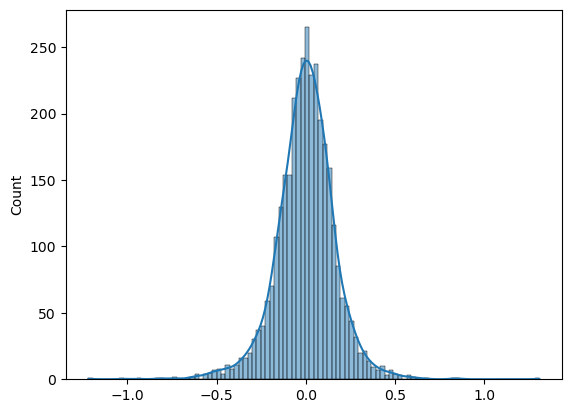

In [39]:
# 2. Normality of error terms
sns.histplot(residuals, kde = True)

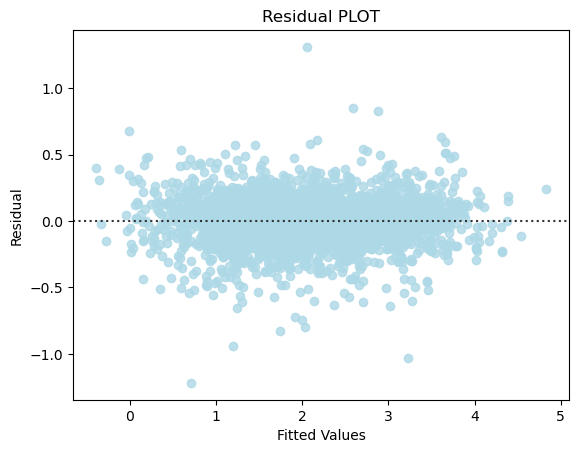

In [40]:
# 3. Linearity of variables
fitted = olsmodel4.fittedvalues

sns.residplot(x = fitted, y = residuals, color = "lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")

plt.show()

In [41]:
# 4. No heteroscedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_training['Price_log'], x_training_lr)
lzip(name, test)

[('F statistic', 0.989562048096377), ('p-value', 0.5820988064686267)]

### Summary of Checking of Assumptions:
1. Mean of residuals should be 0: The mean of the residuals is close to 0, so this assumption is satisfied.
2. Normality of error terms: The disribution of the erros seems to follow a normal distribution, so this assumption is satisfied.
3. Linearity of variables: There is not a particular pattern in the residuals vs fitted values scatter plot now. That leads us to believe that the linearity assumption is satisfied.
4. No heteroscedasticity: the p-value is greater than 0.05, so we fail to reject the null-hypothesis. That means the residuals are homoscedastic and the assumption is satisfied.

## Ridge / Lasso Regularization:

In [42]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#fitting Ridge with the default features
ridge = Ridge()
ridge.fit(x_training, y_training['Price_log'])
scores_table.loc[scores_table.shape[0]] = scores(ridge)

#fitting Ridge with the default features
lasso = Lasso()
lasso.fit(x_training, y_training['Price_log'])
scores_table.loc[scores_table.shape[0]] = scores(lasso)

**Feature Importance: Ridge**

In [43]:
feat_importance = pd.DataFrame(list(zip(ridge.feature_names_in_ , ridge.coef_ )), 
             columns = ['feature_names_in_', 'coef_'] )
feat_importance[feat_importance['coef_'] > 0].sort_values(by = ['coef_'], ascending = False).reset_index(drop = True)


,feature_names_in_,coef_
0,Brand_Mercedes-Benz,0.452922
1,Car_Model_Creta,0.396784
2,Car_Model_Q3,0.370480
3,Car_Model_Hexa,0.367708
4,Car_Model_Cooper,0.353961
...,...,...
70,Car_Model_Ecosport,0.019050
71,Car_Model_CLA,0.013031
72,New_price,0.008513
73,Car_Model_Avventura,0.006112


**Feature Importance: Lasso**

In [44]:
feat_importance = pd.DataFrame(list(zip(lasso.feature_names_in_ , lasso.coef_ )), 
             columns = ['feature_names_in_', 'coef_'] )
feat_importance[feat_importance['coef_'] > 0].sort_values(by = ['coef_'], ascending = False).reset_index(drop = True)


,feature_names_in_,coef_
0,Year,0.024275
1,Power,0.007340
2,New_price,0.004752
3,Engine,0.000276


## Decision Trees

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, f1_score

decision_tree = DecisionTreeRegressor(random_state = 1)
decision_tree.fit(x_training, y_training['Price_log'])
scores_table.loc[scores_table.shape[0]] = scores(decision_tree, 'Decision Tree Regressor')

**Feature Importance:**

In [46]:
feat_importance = pd.DataFrame(list(zip(decision_tree.feature_names_in_ , decision_tree.feature_importances_ )), 
             columns = ['feature_names_in_', 'feature_importances_'] )
feat_importance[feat_importance['feature_importances_']> 0].sort_values(by = ['feature_importances_'], ascending = False).reset_index(drop = True)


,feature_names_in_,feature_importances_
0,New_price,6.431400e-01
1,Year,2.534259e-01
2,Power,2.391816e-02
3,Engine,1.990981e-02
4,Kilometers_Driven_log,1.299392e-02
...,...,...
108,Car_Model_Brio,2.410929e-08
109,Car_Model_7,2.142020e-08
110,Car_Model_New,2.152286e-09
111,Car_Model_GLA,1.053640e-09


## Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(random_state = 1)
random_forest.fit(x_training, y_training['Price_log'])
scores_table.loc[scores_table.shape[0]] = scores(random_forest, 'Random Forest Regressor')

**Feature Importance**

In [48]:
feat_importance = pd.DataFrame(list(zip(random_forest.feature_names_in_ , random_forest.feature_importances_ )), 
             columns = ['feature_names_in_', 'feature_importances_'] )
feat_importance[feat_importance['feature_importances_']> 0].sort_values(by = ['feature_importances_'], ascending = False).reset_index(drop = True)


,feature_names_in_,feature_importances_
0,New_price,5.849834e-01
1,Year,2.443292e-01
2,Power,9.935212e-02
3,Kilometers_Driven_log,1.361918e-02
4,Engine,1.324785e-02
...,...,...
147,Car_Model_Nexon,1.986709e-07
148,Car_Model_redi-GO,9.475713e-08
149,Car_Model_V40,5.881785e-08
150,Car_Model_WR-V,4.539231e-08


## Models Results - First Evaluation:

In [49]:
scores_table

,Model,Rsquared Train,Rsquared Test,RMSE Train,RMSE Test
0,LinearRegression(),0.940486,0.888691,2.571031,3.449431
1,Linear Regression 2,0.937736,0.887172,2.629762,3.472887
2,Linear Regression 3,0.937681,0.887148,2.630921,3.473260
3,Linear Regression 4,0.937681,0.887148,2.630921,3.473260
4,Ridge(),0.939877,0.891101,2.584154,3.411884
5,Lasso(),-1.096325,0.430471,15.259078,7.802607
6,Decision Tree Regressor,0.999994,0.846729,0.025549,4.047727
7,Random Forest Regressor,0.988127,0.912862,1.148343,3.052009


**Observations:**
* From this first evaluation, we can see that the 4th iteration of the linear regression has very good scores both for training and testing data.
* We can see that, while the Ridge Regression performs very good on the training scores and excelent on the training scores, the Lasso Regression does not at all. This might be because the Lasso Regression decreases the number of features to 4.
* The Decision Tree Regressor and Random Forest Regressor perform pretty well. We will continue to perform cross-validation on these models to attemp and get better estimators.
* It seems worth to do cross-validation for Ridge Regression, Decision Tree and Random Forest, since they scored very well on both the Train and the Test scores. Even though the Linear Regression scored highly, the model was already cleaned by iterations.

### **Hyperparameter Tuning: Ridge Regression**

In [50]:
# Choose the type of estimator 
from sklearn.model_selection import GridSearchCV

ridge_tuned = Ridge()

ar = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
parameters = {'alpha':ar}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(r2_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(ridge_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(x_training, y_training['Price_log'])


# Set the model to the best combination of parameters
ridge_tuned = grid_obj.best_estimator_
# Fit the best algorithm to the data
ridge_tuned.fit(x_training, y_training['Price_log'])

print('The best estimator for Ridge Regression is: ' + str(grid_obj.best_estimator_))

scores_table.loc[scores_table.shape[0]] = scores(model = ridge_tuned, model_name = "Ridge - Tuned")
scores_table

The best estimator for Ridge Regression is: Ridge(alpha=1e-05)


,Model,Rsquared Train,Rsquared Test,RMSE Train,RMSE Test
0,LinearRegression(),0.940486,0.888691,2.571031,3.449431
1,Linear Regression 2,0.937736,0.887172,2.629762,3.472887
2,Linear Regression 3,0.937681,0.887148,2.630921,3.473260
3,Linear Regression 4,0.937681,0.887148,2.630921,3.473260
4,Ridge(),0.939877,0.891101,2.584154,3.411884
5,Lasso(),-1.096325,0.430471,15.259078,7.802607
6,Decision Tree Regressor,0.999994,0.846729,0.025549,4.047727
7,Random Forest Regressor,0.988127,0.912862,1.148343,3.052009
8,Ridge - Tuned,0.940486,0.888691,2.571029,3.449430


**Feature Importance**

In [51]:
feat_importance = pd.DataFrame(list(zip(ridge_tuned.feature_names_in_ , ridge_tuned.coef_ )), 
             columns = ['feature_names_in_', 'feature_importances_'] )
feat_importance[feat_importance['feature_importances_'] > 0].sort_values(by = ['feature_importances_'], ascending = False).reset_index(drop = True)


,feature_names_in_,feature_importances_
0,Car_Model_Tucson,0.789113
1,Car_Model_Creta,0.704589
2,Car_Model_Elantra,0.634816
3,Car_Model_Hexa,0.591699
4,Brand_Mercedes-Benz,0.536350
...,...,...
68,Car_Model_BRV,0.011764
69,Car_Model_Avventura,0.011440
70,New_price,0.007007
71,Power,0.003377


### **Hyperparameter Tuning: Decision Tree**

In [52]:
d_tree_tuned = DecisionTreeRegressor(random_state = 1)

# List of values for max_depth, min_samples_split and min_samples_leaf
max_depth = np.arange(10,60,5)
#max_depth[0] = 1

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {'max_depth': max_depth,
              'min_samples_split': max_depth,
              'min_samples_leaf': max_depth,
              'max_features': ['auto', 'sqrt', 'log2']}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(r2_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(x_training, y_training['Price_log'])


# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_
# Fit the best algorithm to the data
dtree_tuned.fit(x_training, y_training['Price_log'])

scores_table.loc[scores_table.shape[0]] = scores(model = dtree_tuned, model_name = "Decision Tree Regressor - Tuned")
scores_table

,Model,Rsquared Train,Rsquared Test,RMSE Train,RMSE Test
0,LinearRegression(),0.940486,0.888691,2.571031,3.449431
1,Linear Regression 2,0.937736,0.887172,2.629762,3.472887
2,Linear Regression 3,0.937681,0.887148,2.630921,3.473260
3,Linear Regression 4,0.937681,0.887148,2.630921,3.473260
4,Ridge(),0.939877,0.891101,2.584154,3.411884
5,Lasso(),-1.096325,0.430471,15.259078,7.802607
6,Decision Tree Regressor,0.999994,0.846729,0.025549,4.047727
7,Random Forest Regressor,0.988127,0.912862,1.148343,3.052009
8,Ridge - Tuned,0.940486,0.888691,2.571029,3.449430
9,Decision Tree Regressor - Tuned,0.912196,0.887329,3.122890,3.470469


In [53]:
print('The best estimator for Decision Tree Regressor is: ' + str(grid_obj.best_estimator_) + '\n\n')

The best estimator for Decision Tree Regressor is: DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=10,
                      min_samples_split=10, random_state=1)




**Feature Importance**

In [54]:
feat_importance = pd.DataFrame(list(zip(dtree_tuned.feature_names_in_ , dtree_tuned.feature_importances_ )), 
             columns = ['feature_names_in_', 'feature_importances_'] )
feat_importance[feat_importance['feature_importances_']> 0].sort_values(by = ['feature_importances_'], ascending = False).reset_index(drop = True)


,feature_names_in_,feature_importances_
0,New_price,0.669449
1,Year,0.266035
2,Power,0.026772
3,Engine,0.021237
4,Kilometers_Driven_log,0.005185
5,Location_Hyderabad,0.002769
6,Mileage,0.002631
7,Location_Kolkata,0.002134
8,Location_Coimbatore,0.000897
9,Car_Model_Sunny,0.000580


### **Hyperparameter Tuning: Random Forest**

In [55]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestRegressor(random_state = 1)

max_depth = np.arange(10,35,5)

# Grid of parameters to choose from
parameters = {'max_depth': max_depth,
              'min_samples_split': max_depth,
              'min_samples_leaf': max_depth,
              'max_features': ['auto', 'sqrt', 'log2']}

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(r2_score, pos_label = 1)
# Run the grid search

grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(x_training, y_training['Price_log'])

# Set the classifier to the best combination of parameters
rf_estimator_tuned_base = grid_obj.best_estimator_
rf_estimator_tuned_base.fit(x_training, y_training['Price_log'])

print('The best estimator for Random Forest Regressor is: ' + str(grid_obj.best_estimator_))

scores_table.loc[scores_table.shape[0]] = scores(model = rf_estimator_tuned_base, model_name = "Random Forest Regressor - Tuned")
scores_table

The best estimator for Random Forest Regressor is: RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                      random_state=1)


,Model,Rsquared Train,Rsquared Test,RMSE Train,RMSE Test
0,LinearRegression(),0.940486,0.888691,2.571031,3.449431
1,Linear Regression 2,0.937736,0.887172,2.629762,3.472887
2,Linear Regression 3,0.937681,0.887148,2.630921,3.473260
3,Linear Regression 4,0.937681,0.887148,2.630921,3.473260
4,Ridge(),0.939877,0.891101,2.584154,3.411884
5,Lasso(),-1.096325,0.430471,15.259078,7.802607
6,Decision Tree Regressor,0.999994,0.846729,0.025549,4.047727
7,Random Forest Regressor,0.988127,0.912862,1.148343,3.052009
8,Ridge - Tuned,0.940486,0.888691,2.571029,3.449430
9,Decision Tree Regressor - Tuned,0.912196,0.887329,3.122890,3.470469


**Feature Importance**

In [56]:
feat_importance = pd.DataFrame(list(zip(rf_estimator_tuned_base.feature_names_in_ , rf_estimator_tuned_base.feature_importances_)), 
             columns = ['feature_names_in_', 'feature_importances_'] )
feat_importance[feat_importance['feature_importances_']> 0].sort_values(by = ['feature_importances_'], ascending = False).reset_index(drop = True)


,feature_names_in_,feature_importances_
0,New_price,6.130477e-01
1,Year,2.541829e-01
2,Power,1.017854e-01
3,Engine,1.182442e-02
4,Kilometers_Driven_log,5.766397e-03
...,...,...
62,Car_Model_Duster,1.679914e-06
63,Location_Chennai,9.291453e-07
64,Car_Model_Ecosport,4.537015e-07
65,Car_Model_Santro,3.561079e-07


In [57]:
print('The best estimator for Decision Tree Regressor is: ' + str(grid_obj.best_estimator_) + '\n\n')

The best estimator for Decision Tree Regressor is: RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                      random_state=1)




## Models Results:

In [58]:
scores_table

,Model,Rsquared Train,Rsquared Test,RMSE Train,RMSE Test
0,LinearRegression(),0.940486,0.888691,2.571031,3.449431
1,Linear Regression 2,0.937736,0.887172,2.629762,3.472887
2,Linear Regression 3,0.937681,0.887148,2.630921,3.473260
3,Linear Regression 4,0.937681,0.887148,2.630921,3.473260
4,Ridge(),0.939877,0.891101,2.584154,3.411884
5,Lasso(),-1.096325,0.430471,15.259078,7.802607
6,Decision Tree Regressor,0.999994,0.846729,0.025549,4.047727
7,Random Forest Regressor,0.988127,0.912862,1.148343,3.052009
8,Ridge - Tuned,0.940486,0.888691,2.571029,3.449430
9,Decision Tree Regressor - Tuned,0.912196,0.887329,3.122890,3.470469


## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

* On the first iteration of models, we can see that Linear Regression, Ridge Regression, Decision Tree Regressor and Random Forest Regressor. Cross validation was done on Ridge Regression, Decision Tree Regressor and Random Forest Regressor.
* After performing cross validation in the previous models, we can see that all of the models underperform in comparison to their original version, which is expected.
* While the tuned Ridge Regression is the one that has the highest R squared score and lowest Train RMSE score for the tuned model, it underperformed in the test data for the tuned models.
* The tuned Decision Tree Regressor and the tuned Random Forest Regressor scored really high and close to each other in the R squared for the training data (the random forest regressor performing slightly better). The RMSE for the training data for the tuned decision trees regressor and the tuned random forest scored higher than the Ridge regression score, yet they were pretty good. The tuned random forest and the tuned decision trees regressor performed better than the ridge regression in the testings scores.
* Between the tuned Decision Tree Regressor and the tuned Random Forest Regressor, the tuned Random Forest Regressor overperformed the tuned Decision Tree Regressor.

**2. Refined insights:** 
* The dataset has 12 independent variables and 1 dependent variable. That being said, a lot of them are categorical and, after getting dummies from the dataset, we end up with 155 variables.
* After processing the variable `Name` with 2041 unique values, we were able to get 2 new variables `Brand` and `Car_Model`, that have 33 and 219 unique variables respectively.
* After Univariate EDA, we transformed to logarithm the variables `Kilometers_Driven` and `Price_log`.
* After Bivariate Analysis, we can see that the following variables have high correlations: New_price - Power (0.88), New_price - Price (0.87), Engine - Power (0.86), New_Price_Log - New_price (0.86), Price - Price_log (0.85), Kilometers_Driven - Kilometers_Driven_log (0.82), Engine - New_Price_Log (0.82), New_Price_Log - Price (0.81), New_price - Price_log (0.78), Power - Price (0.77), Power - Price_log (0.77), Engine - New_price (0.74)
* After 4 iterations of Linear Regression Models, we were able to get a model without unrelevant variables and that satisfies teh assumptions of a linear model. This model ended with 59 relevant variables.
* While the LASSO regression did not provide any good insight or accurate predctions, the RIDGE Regression performed pretty well. This model had 75 relevant variables.
* While the Decision Tree Regression and the Random Forest Regressor seem to overfit the data (with 122 and 152 relevant variables respectively), their tuned versions have close scores with only 23 and 67 r4elevant variables.

**3. Proposal for the final solution design:** 
What model do you propose to be adopted? Why is this the best solution to adopt?

* As a final model selection, the tuned Random Forest Regression seems to be the model that best fits the data while keeping good scores on the testing data.
* The model explains 91.73% of the variation in the data.
* The best estimator from the tuned Random Forest Regressor has the following parameters:
    max_depth=10, min_samples_leaf=10, min_samples_split=10.
* The among the features with the highest importance for the best estimator of the Random Forest Regression, we can find:
    * New_price: 0.6130
    * Year: 0.2542
    * Power: 0.1018
    * Engine: 0.0118
    * Kilometers_Driven_log: 0.0058
    * Mileage: 0.0028
    * Location_Kolkata: 0.0027
    * Location_Hyderabad: 0.0017
    * Seats: 0.0010
    * Car_Model_Innova: 0.0007
    * Location_Coimbatore: 0.0006
    * Car_Model_Swift: 0.0004
    * Transmission_Manual: 0.0004
* For the feature importance, we need to take into consideration that these values are very small given that these are percentages of importance of the model, and that all of these values add up to 1. Since the model has 67 variables, the majority of the variables will have "small" values. Yet, relative to the rest of the model, these have high values.
* While it is not the simplest model (in comparison to the Tuned Decision Tree), it has less relevant variables than the other models (RIDGE and Linear regression).
* Some recommendations include the fixing of the Name variable, in addition to getting more recent data, since the last entry is from a 2019 car.
* Other variable recommendation include: quality of internal part of the car, radio type, wheel type, number of times a car has gotten maintenance. 

# Executive Summary:
    
This project proposes adopting a Random Forest Regression model for the prediction of used cars in the Indian market. The model takes the original price, year, power, engine, kilometers driven as the most relevant variables. The model has a high level of accuracy. The model explains 91.73% of the variance. However, the model is hard to interpret since it does not follow the traditional linear regression model. Fortunately, random forest regression compensates by being really accurate and choosing features of relative more importance and tends to not suffer from overfitting. The accurate prediction of the used car prices in India might help the growth of the used cars industry while protecting the consumers. It is recommended that stakeholder takes into consideration what manufactoring year the car has. Also applies to car brand and car model.


## Problem Summary And Solution Design:
### Problem Summary:
    
The used car industry in India has grown a lot in the past few years. It has even managed to grow over the new car market in India. In 2018-19, the used car industry was valued at 4M, while the new car industry was valued at 3.6M. This growing market is opening opportunities for businesses, such as Cars4U, to fill in the demand of used cars and asigning the right price. While the market for new cars is relatively deterministic and does not have so much variance, since it is managed by OEMs, the market for used cars has many more variables to take into account and can create a lot of variability in the final price. Therefore, the need to assign the right price to a used car is needed to break into the industry. The key objective of this project is to build a regression or machine learning model that correctly predicts the price of used cars in India and improve sales.The discussed analysis and forecast models will help to understand the feature and model selection as serve them as recommended price of sale.

### Solution Design:

Multiple regression models were taken into evaluation, including linear regression, Ridge and Lasso regression, decision tree regressor and random forest regressor. The evaluation was done in 2 stages: an initial evaluation where the data is divided into training and testing data and running a simple regression. And then, on the highly scoring models, perform cross-validation to remove the bias of a unique testing data and get the best estimator. The models with the best performance were selected by evaluating R squared and RMSE scores. The final proposed solution was the best estimator of the tuned Random Forest Regression. The best estimators has max depth=10, minimum samples leaf=10, minimum samples split=10

**Figure 1**, shows 2 graphs. The graph on the right, the first 10 most relevant variables of the tuned Random Forest model are portrayed with their relevance values. As it can be seen, the first 4 variables seem like they are taking over the other variables. Yet, when you zoom into the variables 4 to 12 in level of importance,it can be seen that there is a lot of difference in relevance. 

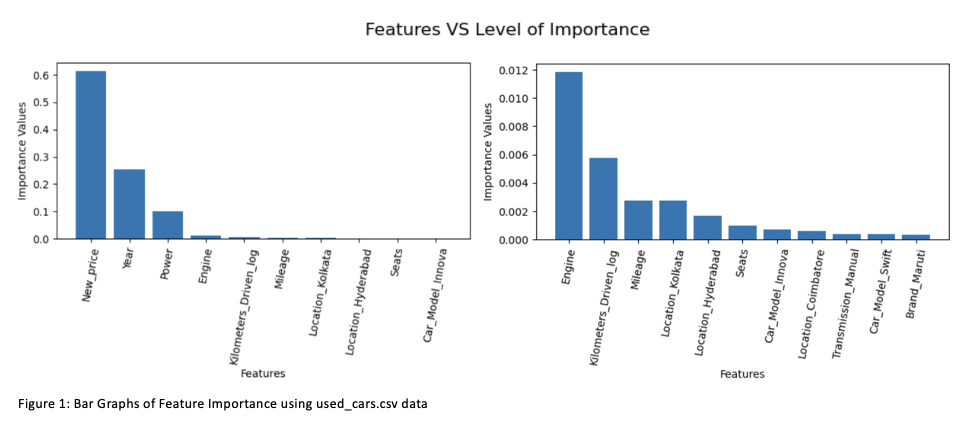



## Analysis and Key Insights:
To better understand the need of accurately estimating the price of a used car in the Indian market, the difference in prices of new cars and used cars needs to be comprehended. In **Figure 2**, we can see a comparison of prices for new cars and used cars by their manufacture year and with their variance depending on location. It can be seen that with every manufaturing year, the new price is higher than the used price. That being said, in the most recent manufactoring years, the price of used cars has decline up to the point that the variances of the new price and of the used price overlaps. Patircularly with the cars manufactured 2018, where the lowest point of the variance of the new price cars matches the average of the price of the new cars. This might be caused by the young age of the cars and the possibility that these might had suffer less damages than its older counterparts.

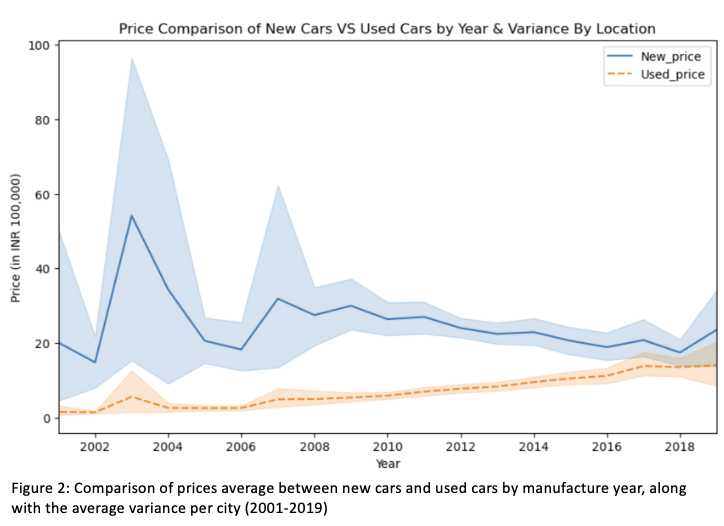


## Limitations and Recommendations For Implementation:

It is important to note that the model only takes into consideration a certain selection of brands, car models and manufactoring years. While the model is design to fill in the missing data, it is important to keep in mind the predictions for those cases might have additional bias.

Recalling the analysis of **Figure 2** on the closeness of the average prices in the most recent manufactoring years, the client should be careful when assigning final prices to newer models since, depending on the city, the model's suggested price might be equal or higher than the car's price when new, and giving a loosing competitive advantage to other companies. It is also important to take into consideration that a random forest regression, while easy to navigate, it is complicated to interpret.

It is recommended that the model is updates as time passes, due to variance of the prices assigned by the OEMs. Additionally, inflation is not taken into consideration in how the model is affected. The inflation from the month the vehicle was sold can be included in the dataset. The client should invest on cars with recent manufactoring years, since they have higher used car price. Also, keep an eye out for models with low kilometers driven and powerful power and engine.